In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=6be61ac950cad6828e54f1757607ccaab09267fd275778a6000bdeb4b03a41f9
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Define input variables

In [4]:
solar_irradiance = ctrl.Antecedent(np.arange(0, 100, 1), 'solar_irradiance')
panel_temperature = ctrl.Antecedent(np.arange(0, 60, 1), 'panel_temperature')
dc_voltage = ctrl.Antecedent(np.arange(0, 1000, 1), 'dc_voltage')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')

Define output variables

In [5]:
alert = ctrl.Consequent(np.arange(0, 101, 1), 'alert')
performance = ctrl.Consequent(np.arange(0, 101, 1), 'performance')

Define membership functions for input variables

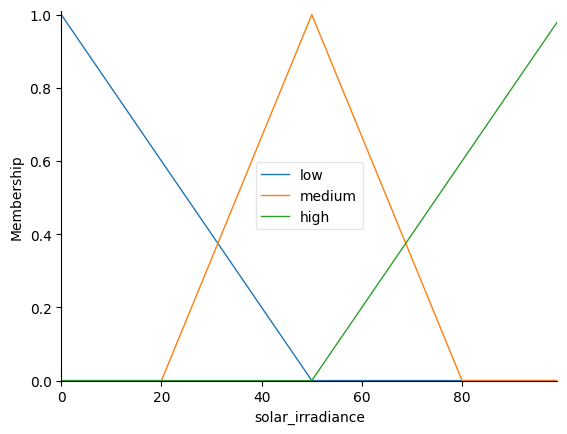

In [6]:
solar_irradiance['low'] = fuzz.trimf(solar_irradiance.universe, [0, 0, 50])
solar_irradiance['medium'] = fuzz.trimf(solar_irradiance.universe, [20, 50, 80])
solar_irradiance['high'] = fuzz.trimf(solar_irradiance.universe, [50, 100, 100])
solar_irradiance.view()

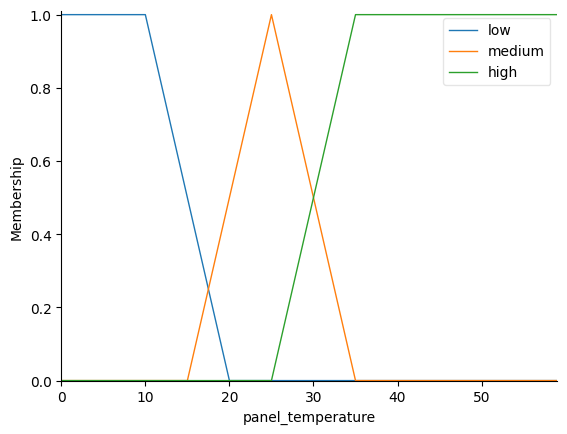

In [7]:
panel_temperature['low'] = fuzz.trapmf(panel_temperature.universe, [0,0, 10, 20])
panel_temperature['medium'] = fuzz.trimf(panel_temperature.universe, [15, 25, 35])
panel_temperature['high'] = fuzz.trapmf(panel_temperature.universe, [25, 35, 60, 60])
panel_temperature.view()

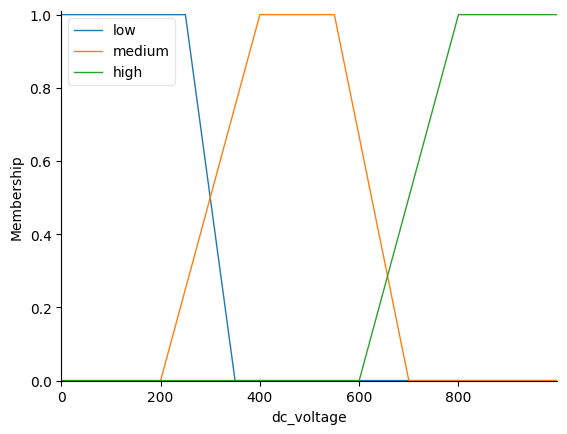

In [8]:
dc_voltage['low'] = fuzz.trapmf(dc_voltage.universe, [0, 0, 250,350])
dc_voltage['medium'] = fuzz.trapmf(dc_voltage.universe, [200,400, 550, 700])
dc_voltage['high'] = fuzz.trapmf(dc_voltage.universe, [600,800, 1000, 1000])
dc_voltage.view()

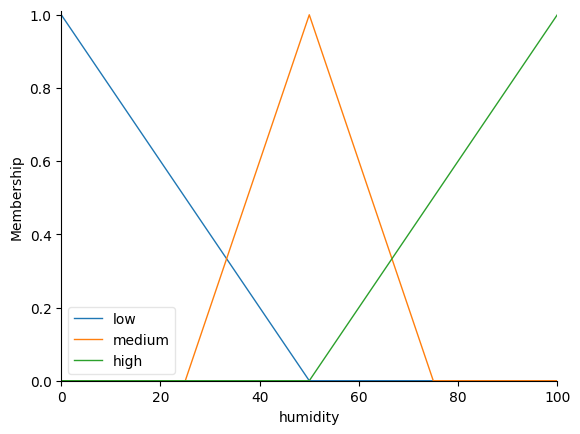

In [9]:
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [25, 50, 75])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])
humidity.view()

Define membership functions for output variables

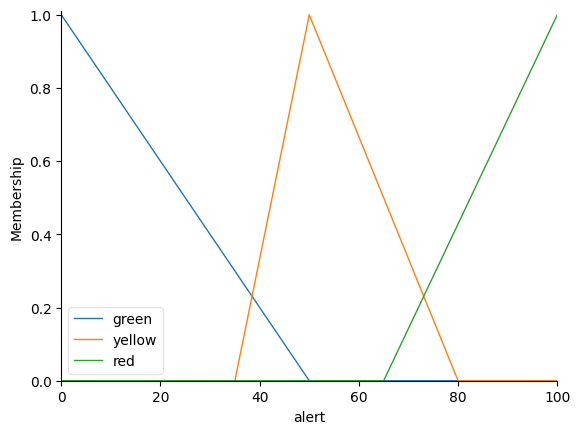

In [10]:
alert['green'] = fuzz.trimf(alert.universe, [0, 0, 50])
alert['yellow'] = fuzz.trimf(alert.universe, [35, 50, 80])
alert['red'] = fuzz.trimf(alert.universe, [65, 100, 100])
alert.view()

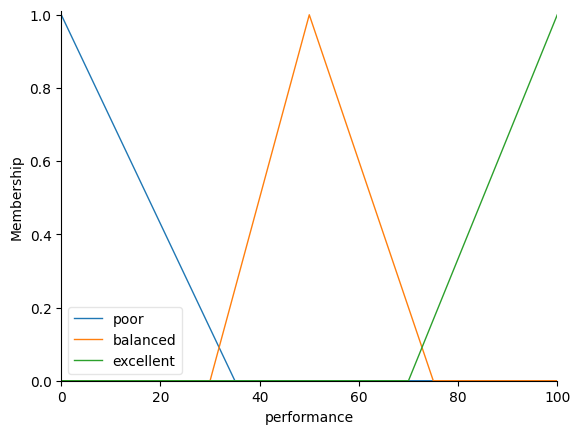

In [11]:
performance['poor'] = fuzz.trimf(performance.universe, [0, 0, 35])
performance['balanced'] = fuzz.trimf(performance.universe, [30, 50, 75])
performance['excellent'] = fuzz.trimf(performance.universe, [70, 100, 100])
performance.view()

Define fuzzy rules

In [12]:
rule1=ctrl.Rule(solar_irradiance['low'] & panel_temperature['low'] & dc_voltage['low'] & humidity['low'], (alert['red'], performance['poor']))
rule2=ctrl.Rule(solar_irradiance['low'] & panel_temperature['low'] & dc_voltage['low'] & humidity['medium'], (alert['yellow'], performance['poor']))
rule3=ctrl.Rule(solar_irradiance['low'] & panel_temperature['low'] & dc_voltage['low'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule4=ctrl.Rule(solar_irradiance['low'] & panel_temperature['low'] & dc_voltage['medium'] & humidity['low'], (alert['green'], performance['balanced']))
rule5=ctrl.Rule(solar_irradiance['low'] & panel_temperature['low'] & dc_voltage['medium'] & humidity['medium'], (alert['green'], performance['balanced']))
rule6=ctrl.Rule(solar_irradiance['low'] & panel_temperature['low'] & dc_voltage['medium'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule7=ctrl.Rule(solar_irradiance['low'] & panel_temperature['low'] & dc_voltage['high'] & humidity['low'], (alert['green'], performance['excellent']))
rule8=ctrl.Rule(solar_irradiance['low'] & panel_temperature['low'] & dc_voltage['high'] & humidity['medium'], (alert['green'], performance['balanced']))
rule9=ctrl.Rule(solar_irradiance['low'] & panel_temperature['low'] & dc_voltage['high'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule10=ctrl.Rule(solar_irradiance['low'] & panel_temperature['medium'] & dc_voltage['low'] & humidity['low'], (alert['red'], performance['poor']))
rule11=ctrl.Rule(solar_irradiance['low'] & panel_temperature['medium'] & dc_voltage['low'] & humidity['medium'], (alert['yellow'], performance['balanced']))
rule12=ctrl.Rule(solar_irradiance['low'] & panel_temperature['medium'] & dc_voltage['low'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule13=ctrl.Rule(solar_irradiance['low'] & panel_temperature['medium'] & dc_voltage['medium'] & humidity['low'], (alert['red'], performance['poor']))
rule14=ctrl.Rule(solar_irradiance['low'] & panel_temperature['medium'] & dc_voltage['medium'] & humidity['medium'], (alert['yellow'], performance['balanced']))
rule15=ctrl.Rule(solar_irradiance['low'] & panel_temperature['medium'] & dc_voltage['medium'] & humidity['high'], (alert['green'], performance['balanced']))
rule16=ctrl.Rule(solar_irradiance['low'] & panel_temperature['medium'] & dc_voltage['high'] & humidity['low'], (alert['yellow'], performance['balanced']))
rule17=ctrl.Rule(solar_irradiance['low'] & panel_temperature['medium'] & dc_voltage['high'] & humidity['medium'], (alert['yellow'], performance['balanced']))
rule18=ctrl.Rule(solar_irradiance['low'] & panel_temperature['medium'] & dc_voltage['high'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule19=ctrl.Rule(solar_irradiance['low'] & panel_temperature['high'] & dc_voltage['low'] & humidity['low'], (alert['red'], performance['poor']))
rule20=ctrl.Rule(solar_irradiance['low'] & panel_temperature['high'] & dc_voltage['low'] & humidity['medium'], (alert['red'], performance['poor']))
rule21=ctrl.Rule(solar_irradiance['low'] & panel_temperature['high'] & dc_voltage['low'] & humidity['high'], (alert['yellow'], performance['poor']))
rule22=ctrl.Rule(solar_irradiance['low'] & panel_temperature['high'] & dc_voltage['medium'] & humidity['low'], (alert['red'], performance['poor']))
rule23=ctrl.Rule(solar_irradiance['low'] & panel_temperature['high'] & dc_voltage['medium'] & humidity['medium'], (alert['yellow'], performance['poor']))
rule24=ctrl.Rule(solar_irradiance['low'] & panel_temperature['high'] & dc_voltage['medium'] & humidity['high'], (alert['green'], performance['poor']))
rule25=ctrl.Rule(solar_irradiance['low'] & panel_temperature['high'] & dc_voltage['high'] & humidity['low'], (alert['red'], performance['poor']))
rule26=ctrl.Rule(solar_irradiance['low'] & panel_temperature['high'] & dc_voltage['high'] & humidity['medium'], (alert['red'], performance['poor']))
rule27=ctrl.Rule(solar_irradiance['low'] & panel_temperature['high'] & dc_voltage['high'] & humidity['high'], (alert['red'], performance['poor']))
rule28=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['low'] & dc_voltage['low'] & humidity['low'], (alert['yellow'], performance['poor']))
rule29=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['low'] & dc_voltage['low'] & humidity['medium'], (alert['green'], performance['balanced']))
rule30=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['low'] & dc_voltage['low'] & humidity['high'], (alert['green'], performance['balanced']))
rule31=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['low'] & dc_voltage['medium'] & humidity['low'], (alert['green'], performance['balanced']))
rule32=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['low'] & dc_voltage['medium'] & humidity['medium'], (alert['green'], performance['balanced']))
rule33=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['low'] & dc_voltage['medium'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule34=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['low'] & dc_voltage['high'] & humidity['low'], (alert['green'], performance['excellent']))
rule35=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['low'] & dc_voltage['high'] & humidity['medium'], (alert['green'], performance['balanced']))
rule36=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['low'] & dc_voltage['high'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule37=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['medium'] & dc_voltage['low'] & humidity['low'], (alert['yellow'], performance['poor']))
rule38=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['medium'] & dc_voltage['low'] & humidity['medium'], (alert['yellow'], performance['balanced']))
rule39=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['medium'] & dc_voltage['low'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule40=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['medium'] & dc_voltage['medium'] & humidity['low'], (alert['green'], performance['balanced']))
rule41=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['medium'] & dc_voltage['medium'] & humidity['medium'], (alert['green'], performance['balanced']))
rule42=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['medium'] & dc_voltage['medium'] & humidity['high'], (alert['green'], performance['balanced']))
rule43=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['medium'] & dc_voltage['high'] & humidity['low'], (alert['green'], performance['excellent']))
rule44=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['medium'] & dc_voltage['high'] & humidity['medium'], (alert['green'], performance['excellent']))
rule45=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['medium'] & dc_voltage['high'] & humidity['high'], (alert['yellow'], performance['excellent']))
rule46=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['high'] & dc_voltage['low'] & humidity['low'], (alert['red'], performance['poor']))
rule47=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['high'] & dc_voltage['low'] & humidity['medium'], (alert['red'], performance['poor']))
rule48=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['high'] & dc_voltage['low'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule49=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['high'] & dc_voltage['medium'] & humidity['low'], (alert['red'], performance['poor']))
rule50=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['high'] & dc_voltage['medium'] & humidity['medium'], (alert['yellow'], performance['balanced']))
rule51=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['high'] & dc_voltage['medium'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule52=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['high'] & dc_voltage['high'] & humidity['low'], (alert['yellow'], performance['excellent']))
rule53=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['high'] & dc_voltage['high'] & humidity['medium'], (alert['green'], performance['balanced']))
rule54=ctrl.Rule(solar_irradiance['medium'] & panel_temperature['high'] & dc_voltage['high'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule55=ctrl.Rule(solar_irradiance['high'] & panel_temperature['low'] & dc_voltage['low'] & humidity['low'], (alert['green'], performance['balanced']))
rule56=ctrl.Rule(solar_irradiance['high'] & panel_temperature['low'] & dc_voltage['low'] & humidity['medium'], (alert['green'], performance['balanced']))
rule57=ctrl.Rule(solar_irradiance['high'] & panel_temperature['low'] & dc_voltage['low'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule58=ctrl.Rule(solar_irradiance['high'] & panel_temperature['low'] & dc_voltage['medium'] & humidity['low'], (alert['green'], performance['balanced']))
rule59=ctrl.Rule(solar_irradiance['high'] & panel_temperature['low'] & dc_voltage['medium'] & humidity['medium'], (alert['green'], performance['excellent']))
rule60=ctrl.Rule(solar_irradiance['high'] & panel_temperature['low'] & dc_voltage['medium'] & humidity['high'], (alert['green'], performance['excellent']))
rule61=ctrl.Rule(solar_irradiance['high'] & panel_temperature['low'] & dc_voltage['high'] & humidity['low'], (alert['yellow'], performance['balanced']))
rule62=ctrl.Rule(solar_irradiance['high'] & panel_temperature['low'] & dc_voltage['high'] & humidity['medium'], (alert['red'], performance['balanced']))
rule63=ctrl.Rule(solar_irradiance['high'] & panel_temperature['low'] & dc_voltage['high'] & humidity['high'], (alert['red'], performance['balanced']))
rule64=ctrl.Rule(solar_irradiance['high'] & panel_temperature['medium'] & dc_voltage['low'] & humidity['low'], (alert['yellow'], performance['balanced']))
rule65=ctrl.Rule(solar_irradiance['high'] & panel_temperature['medium'] & dc_voltage['low'] & humidity['medium'], (alert['yellow'], performance['balanced']))
rule66=ctrl.Rule(solar_irradiance['high'] & panel_temperature['medium'] & dc_voltage['low'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule67=ctrl.Rule(solar_irradiance['high'] & panel_temperature['medium'] & dc_voltage['medium'] & humidity['low'], (alert['green'], performance['balanced']))
rule68=ctrl.Rule(solar_irradiance['high'] & panel_temperature['medium'] & dc_voltage['medium'] & humidity['medium'], (alert['green'], performance['balanced']))
rule69=ctrl.Rule(solar_irradiance['high'] & panel_temperature['medium'] & dc_voltage['medium'] & humidity['high'], (alert['green'], performance['balanced']))
rule70=ctrl.Rule(solar_irradiance['high'] & panel_temperature['medium'] & dc_voltage['high'] & humidity['low'], (alert['yellow'], performance['balanced']))
rule71=ctrl.Rule(solar_irradiance['high'] & panel_temperature['medium'] & dc_voltage['high'] & humidity['medium'], (alert['green'], performance['excellent']))
rule72=ctrl.Rule(solar_irradiance['high'] & panel_temperature['medium'] & dc_voltage['high'] & humidity['high'], (alert['yellow'], performance['balanced']))
rule73=ctrl.Rule(solar_irradiance['high'] & panel_temperature['high'] & dc_voltage['low'] & humidity['low'], (alert['red'], performance['poor']))
rule74=ctrl.Rule(solar_irradiance['high'] & panel_temperature['high'] & dc_voltage['low'] & humidity['medium'], (alert['red'], performance['poor']))
rule75=ctrl.Rule(solar_irradiance['high'] & panel_temperature['high'] & dc_voltage['low'] & humidity['high'], (alert['red'], performance['balanced']))
rule76=ctrl.Rule(solar_irradiance['high'] & panel_temperature['high'] & dc_voltage['medium'] & humidity['low'], (alert['yellow'], performance['balanced']))
rule77=ctrl.Rule(solar_irradiance['high'] & panel_temperature['high'] & dc_voltage['medium'] & humidity['medium'], (alert['yellow'], performance['balanced']))
rule78=ctrl.Rule(solar_irradiance['high'] & panel_temperature['high'] & dc_voltage['medium'] & humidity['high'], (alert['yellow'], performance['poor']))
rule79=ctrl.Rule(solar_irradiance['high'] & panel_temperature['high'] & dc_voltage['high'] & humidity['low'], (alert['green'], performance['excellent']))
rule80=ctrl.Rule(solar_irradiance['high'] & panel_temperature['high'] & dc_voltage['high'] & humidity['medium'], (alert['yellow'], performance['balanced']))
rule81=ctrl.Rule(solar_irradiance['high'] & panel_temperature['high'] & dc_voltage['high'] & humidity['high'], (alert['yellow'], performance['balanced']))

In [13]:
maintenance_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30,rule31,rule32,rule33,rule34,    rule35, rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44, rule45, rule46, rule47, rule48, rule49, rule50, rule51, rule52, rule53, rule54, rule55, rule56, rule57, rule58, rule59, rule60, rule61, rule62, rule63, rule64, rule65, rule66, rule67, rule68, rule69, rule70, rule71, rule72, rule73, rule74, rule75, rule76, rule77, rule78, rule79, rule80, rule81])
maintenance_system = ctrl.ControlSystemSimulation(maintenance_ctrl)

Enter solar irradiance level (0-100 W/m2): 85
Enter panel temperature (0-60 Celsius degree): 25
Enter DC voltage output (0-1000 V): 896
Enter humidity level (0-100 %): 45
Maintenance Alerts: 23.23597678916824 %
Performance Monitoring: 80.60075329566855 %


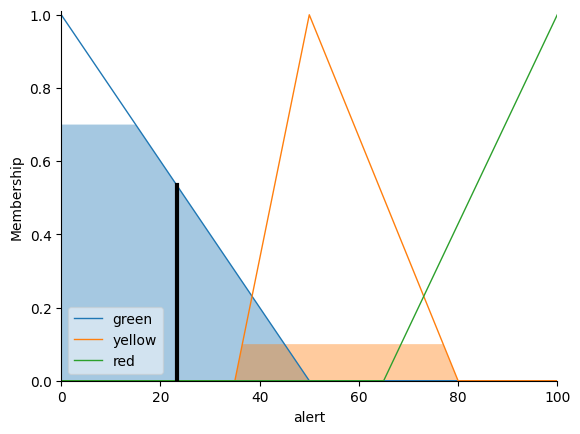

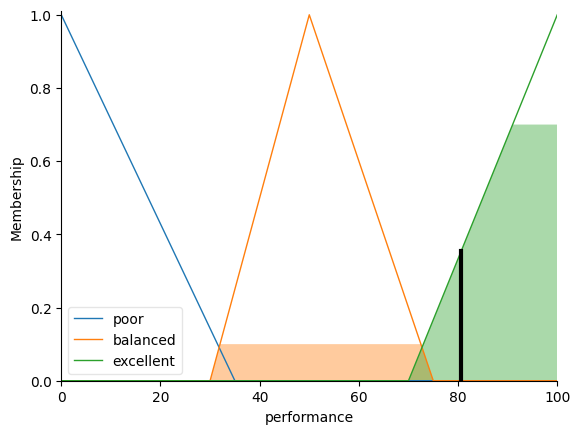

In [14]:
maintenance_system.input['solar_irradiance'] = float(input('Enter solar irradiance level (0-100 W/m2): '))
maintenance_system.input['panel_temperature'] = float(input('Enter panel temperature (0-60 Celsius degree): '))
maintenance_system.input['dc_voltage'] = float(input('Enter DC voltage output (0-1000 V): '))
maintenance_system.input['humidity'] = float(input('Enter humidity level (0-100 %): '))

maintenance_system.compute()

# Print the outputs
print('Maintenance Alerts:', maintenance_system.output['alert'], '%')
print('Performance Monitoring:', maintenance_system.output['performance'], '%')

# Plot membership functions
alert.view(sim=maintenance_system)
performance.view(sim=maintenance_system)